In [1]:
#import boto3
from astropy.io import fits
from io import BytesIO
import sys
import pandas as pd 
import numpy as np 
import os
import matplotlib.pyplot as plt
sys.path.append('/home/bekah/gPhoton2')
from gPhoton.coadd import zero_flag_and_edge
import pyarrow.parquet as parquet


In [ ]:
# dose maps are made using what from photonlists? 

In [2]:
# import mask at 2400 wide resolution 
# this was made with dose maps 
fuv_drawn = fits.open("/home/bekah/glcat/masks/drawn/fuv_drawn_mask.fits")

In [3]:
# read in photonlist 
photons = parquet.read_table("/home/bekah/glcat/notebooks/masks_flats/e00834-fd-b00.parquet").to_pandas()

In [4]:
photons = photons[(photons['detrad'] < 600)]

In [ ]:
plt.imshow(fuv_drawn[0].data,interpolation=None)

In [ ]:
def dosemap_ranges(radius):
    slop = 400 - radius
    return [slop, 3200 - slop], [slop, 3200 - slop]

x, y = dosemap_ranges(600)

In [5]:
photons['col_rounded'] = photons['col'].round().astype(int)*4 # x 
photons['row_rounded'] = photons['row'].round().astype(int)*4 # y 

In [9]:
photons = photons[(photons['col_rounded'] >= -200) & (photons['row_rounded'] <= 3400) & (photons['row_rounded'] >= -200) & (photons['col_rounded'] <= 3400)]

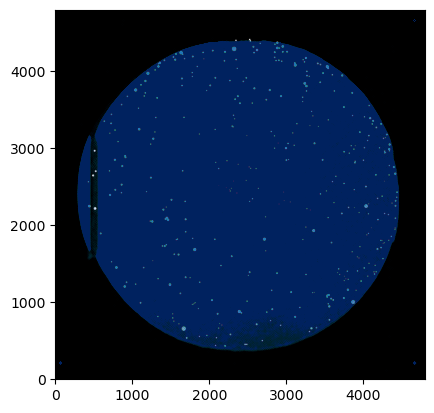

In [24]:
plt.imshow(fuv_drawn[0].data,interpolation=None, origin='lower', cmap='grey')
plt.scatter(photons['col']*(16/3)+200*(4/3),photons['row']*(16/3)+200*(4/3),s=.00005)


In [ ]:
mask = fuv_drawn[0].data[photons['col'], photons['row']] == 1
photons['is_one'] = mask

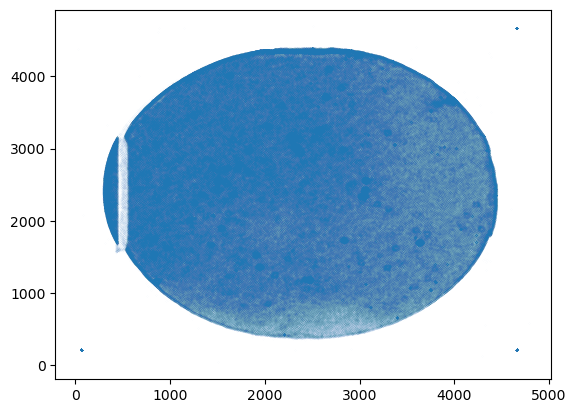

In [25]:
plt.scatter(photons['col']*(16/3)+200*(4/3),photons['row']*(16/3)+200*(4/3),s=.00005)


In [27]:
3316*(4/3)+200

4621.333333333333

In [34]:
(photons['col']*(16/3)+200*(4/3)).describe()

count    2.790364e+06
mean     2.318656e+03
std      1.053697e+03
min      2.608990e+01
25%      1.472356e+03
50%      2.301241e+03
75%      3.118837e+03
max      4.784679e+03
Name: col, dtype: float64

In [30]:
-*4/3

-240.0

In [26]:
(photons['col']).describe()

count    2.790364e+06
mean     3.847482e+02
std      1.975773e+02
min     -4.510814e+01
25%      2.260667e+02
50%      3.814827e+02
75%      5.347818e+02
max      8.471274e+02
Name: col, dtype: float64

In [32]:
-200*(4/3)

-266.66666666666663

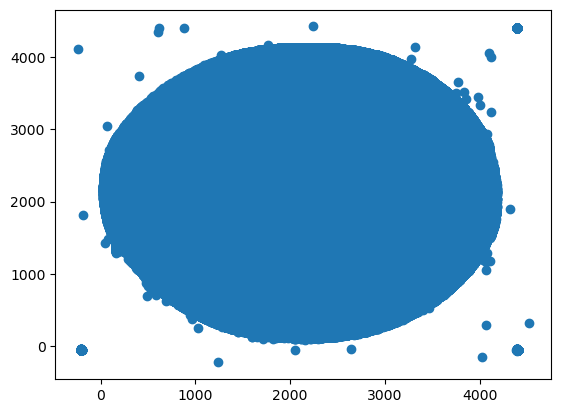

In [45]:
plt.scatter((photons['col_rounded']*4/3),(photons['row_rounded']*4/3))

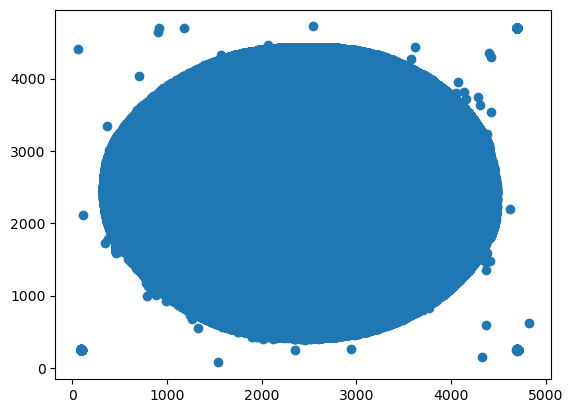

In [46]:
plt.scatter((photons['col_rounded']*4/3)+300,(photons['row_rounded']*4/3)+300)